### Polynomial Regression: $$y = b_{0} + b_{1}x_{1} + b_{2}x_{1}^{2} + ... +b_{n}x_{1}^{n}$$

## Main Question

> A candidate that we are considering to hire is asking for a salary of 160,000 US dollars per year. He justifies this by claiming that he earned the same amount at his previous company! The person/candidate has worked as region manager for two years!  

> **Is his claim true or is it a bluff?**

## Data Understanding

**1.0. What is the domain area of the dataset?**  
The dataset *Position_Salaries.csv* contains information about different salaries at a company for different positions!  

**1.1. Under which circumstances was it collected?**  
It was obtained through different websites!  

**2.0. Which data format?**  
The data is in *CSV* format!  

In [3]:
# Importing libraries

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score

In [4]:
position_dataset = pd.read_csv('../Datasets/Position_Salaries.csv')

### Basic Exploratory Data Analysis

In [5]:
position_dataset.head()

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000


In [6]:
position_dataset.describe()

,Level,Salary
count,10.00000,10.000000
mean,5.50000,249500.000000
std,3.02765,299373.883668
min,1.00000,45000.000000
25%,3.25000,65000.000000
50%,5.50000,130000.000000
75%,7.75000,275000.000000
max,10.00000,1000000.000000


In [7]:
print(f"Number of features in the dataset is {position_dataset.shape[1]} and the number of observations/rows in the dataset is {position_dataset.shape[0]}")

Number of features in the dataset is 3 and the number of observations/rows in the dataset is 10


### Checking Missing Values

In [8]:
position_dataset.isnull().sum()

Position    0
Level       0
Salary      0
dtype: int64

In [9]:
position_dataset.isna().sum()

Position    0
Level       0
Salary      0
dtype: int64

### Assumption

> Curvilinear relationship

* The relationship between dependent and independent variables is curvilinear!

In [10]:
X = position_dataset.iloc[:, 1:-1].values
y = position_dataset.iloc[:, -1].values

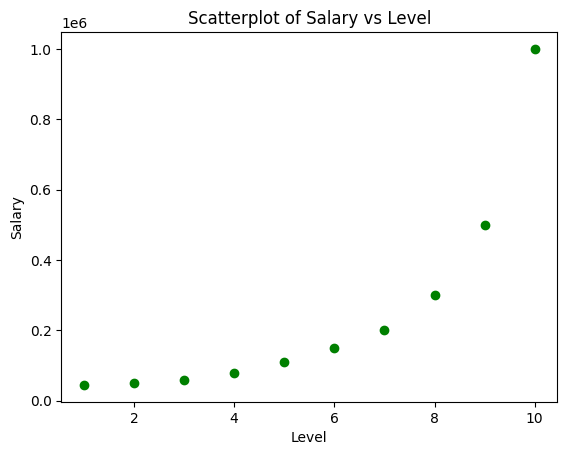

In [11]:
plt.scatter(X, y, color='green')
plt.xlabel('Level')
plt.ylabel('Salary')
plt.title('Scatterplot of Salary vs Level')
plt.show()

* The Scatterplot shows that the association between these two is **more curvy than linear!**  

## Model Building

* Because the dataset is very small we are not going to split the dataset to training and test sets!  
* Here we are making both a simple linear regression and a polynomial regression model for better understanding of how *polynomial regression* work!  

### Simple Linear Regression Model

In [12]:
# Creating and training a simple linear regression model on the dataset! 

simple_linear_reg_model = LinearRegression()
simple_linear_reg_model.fit(X, y)

LinearRegression()

#### Visualizing the simple linear regression model

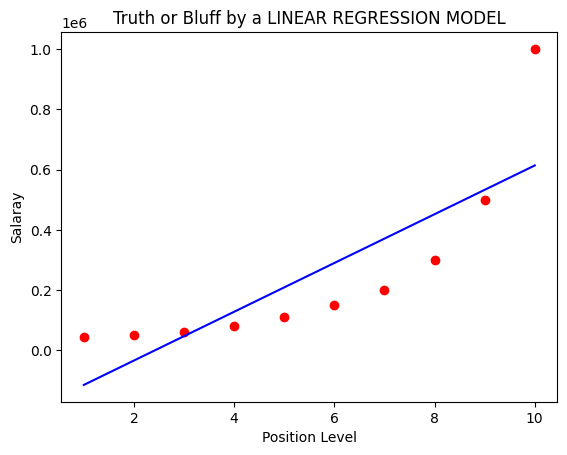

In [13]:
plt.scatter(X, y, color = "red")
plt.plot(X, simple_linear_reg_model.predict(X), color='blue')
plt.title("Truth or Bluff by a LINEAR REGRESSION MODEL")
plt.xlabel("Position Level")
plt.ylabel('Salaray')
plt.show()

* The predicted values or blue lines clearly shows that the simple linear regression is not the best model here! Because the line does not capture the data points which  
leads to predicting wrong values for an input!  

### Polynomial Regression Model

* With *degree* of *2*

In [14]:
# Polynomial Regression
poly_reg_d2 = PolynomialFeatures(degree= 2)
X_poly = poly_reg_d2.fit_transform(X)
linear_poly_reg = LinearRegression()
linear_poly_reg.fit(X_poly, y)

LinearRegression()

#### Visualizing polynomial regression model

* With *degree* of *2*.

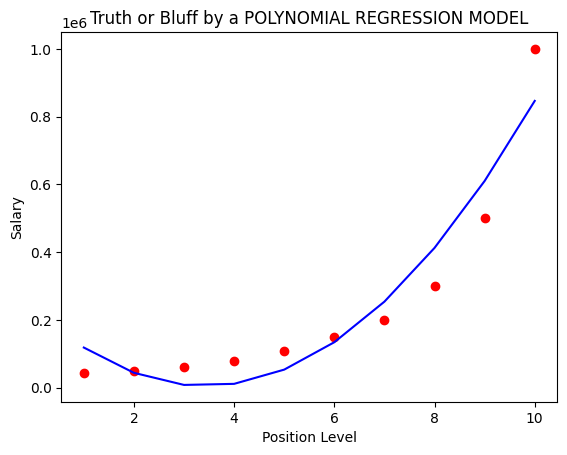

In [15]:
plt.scatter(X, y, color = "red")
plt.plot(X, linear_poly_reg.predict(poly_reg_d2.fit_transform(X)), color = "blue")
plt.title("Truth or Bluff by a POLYNOMIAL REGRESSION MODEL")
plt.xlabel('Position Level')
plt.ylabel('Salary')
plt.show()

* With *degree* of *3*.

In [16]:
# Polynomial Regression
poly_reg_d3 = PolynomialFeatures(degree= 3)
X_poly = poly_reg_d3.fit_transform(X)
linear_poly_reg = LinearRegression()
linear_poly_reg.fit(X_poly, y)

LinearRegression()

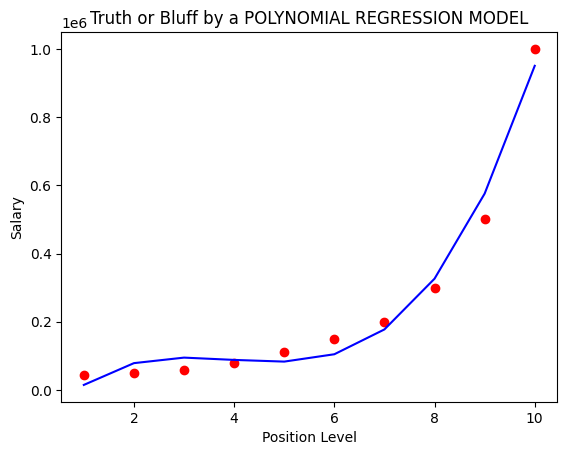

In [17]:
plt.scatter(X, y, color = "red")
plt.plot(X, linear_poly_reg.predict(poly_reg_d3.fit_transform(X)), color = "blue")
plt.title("Truth or Bluff by a POLYNOMIAL REGRESSION MODEL")
plt.xlabel('Position Level')
plt.ylabel('Salary')
plt.show()

**Varning: (OVERFITTING)**
> (In GENERAL) Increasing the value of *degree* leads the model to overfitting! 

### Main Question:

> A candidate that we are considering to hire is asking for a salary of 160,000 US dollars per year. He justifies this by claiming that he earned the same amount at his previous company! The person/candidate has worked as region manager for two years!  

> **Is his claim true or is it a bluff?**

### Answer

* **Predicting how much he should earn by simple linear regression**

He has worked as as region manager for over two years, therefore the position is *6.5* now!  
In other words his salary now must between 150,000 to 200,000!  

In [18]:
y_pred_slr = simple_linear_reg_model.predict([[6.5]])
print("The predicted salary by SIMPLE LINEAR REGRESSION for the candidate is:", round(y_pred_slr[0]), "US Dollars") 

The predicted salary by SIMPLE LINEAR REGRESSION for the candidate is: 330379 US Dollars


* **Predicting how much he should earn by polynomial regression**

In [19]:
y_pred_polyReg = linear_poly_reg.predict(poly_reg_d3.fit_transform([[6.5]]))
print("The predicted salary by POLYNOMIAL REGRESSION for the candidate is:", round(y_pred_polyReg[0]), "US Dollars") 

The predicted salary by POLYNOMIAL REGRESSION for the candidate is: 133259 US Dollars


> The candidate's claim about its salary is **NOT** true!  
> His new salary should be around **130,000 to 135,000 US Dollars**!  

> **NOTE:** The simple linear regression model has been used for showing that it is not suitable when the relationship between variables is not *LINEAR*!  

## Model Evaluation

In [28]:
y_pred_polyReg_all = linear_poly_reg.predict(X_poly)

mse = mean_squared_error(y, y_pred_polyReg_all)
print("Mean Squared Error: ", round(mse, 2))

r2 = r2_score(y, y_pred_polyReg_all)
print("Mean Squared Error: ", round(r2, 2))

Mean Squared Error:  1515662004.66
Mean Squared Error:  0.98
